# Project: Machine Learning Prophet and XGBoost to predict hourly UK energy price

Procedure:
1. Import the data
2. Clean the data
3. Datetime the  data
4. deal with NaN values
5. ensure correct format
6. prepare the data for machine learning
7. shift data and remove last row
8. split data into test and train
9. train the data with machine learning
10. analyze the data 
11. utilize Cross Validation and MSE to measure models success
12. optimize the data with XGBoost

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('electricity_dah_prices.csv')

df

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67
...,...,...,...,...,...,...,...,...
8756,2022/12/31,19:00 - 20:00,18.11,333.00,22.09,18.11,228.00,-1.01
8757,2022/12/31,20:00 - 21:00,7.60,310.00,10.55,7.60,204.38,-1.39
8758,2022/12/31,21:00 - 22:00,3.69,270.00,5.22,3.69,175.23,-1.04
8759,2022/12/31,22:00 - 23:00,1.88,217.78,2.39,1.88,177.39,-1.07


In [2]:
df.apply(pd.isnull).sum() / df.shape[0]

date       0.000000
hour       0.000000
france     0.000114
italy      0.000114
belgium    0.000114
spain      0.000114
uk         0.164593
germany    0.000114
dtype: float64

UK has alot 16% of the data blank, lets see whats going on

In [3]:
df[pd.isnull(df.uk)]

,date,hour,france,italy,belgium,spain,uk,germany
2042,2022/03/27,02:00 - 03:00,NaN,NaN,NaN,NaN,NaN,NaN
2664,2022/04/22,00:00 - 01:00,216.06,217.65,185.08,216.06,NaN,191.07
2665,2022/04/22,01:00 - 02:00,190.91,206.27,180.70,200.00,NaN,183.93
2666,2022/04/22,02:00 - 03:00,187.01,199.20,187.01,187.01,NaN,187.01
2667,2022/04/22,03:00 - 04:00,179.41,199.02,179.41,179.41,NaN,179.41
...,...,...,...,...,...,...,...,...
7268,2022/10/30,19:00 - 20:00,165.00,165.00,165.00,200.00,NaN,165.00
7269,2022/10/30,20:00 - 21:00,147.52,147.52,147.52,225.35,NaN,147.52
7270,2022/10/30,21:00 - 22:00,139.08,139.08,138.92,209.27,NaN,138.96
7271,2022/10/30,22:00 - 23:00,127.00,119.99,127.00,157.31,NaN,127.00


In [4]:
null_uk = df[df.uk.isnull()]

grouped_null_uk = null_uk.groupby('date').size()
count_24 = 0
for day in grouped_null_uk:
    if grouped_null_uk[day] == 24:
        count_24 += 1
        
count_24

61

There are 61 missing days, lets remove UK and solve for another country

# Project: Machine Learning Prophet and XGBoost to predict hourly Italy* energy price

Dropping UK column

In [5]:
df = df.drop('uk', axis=1)

dropping rows that have nan values

In [6]:
df = df.dropna()

In [7]:
df.apply(pd.isnull).sum() / df.shape[0]

date       0.0
hour       0.0
france     0.0
italy      0.0
belgium    0.0
spain      0.0
germany    0.0
dtype: float64

Ok we have no more NaN values, lets see whats next:

- Import the data (x)
- Clean the data (x)
- Datetime the data
- deal with NaN values (x)
- ensure correct format
- prepare the data for machine learning
- shift data and remove last row
- split data into test and train
- train the data with machine learning
- analyze the data
- utilize Cross Validation and MSE to measure models success
- optimize the data with XGBoost

Datetime  the data

In [8]:
df['hour'] = df['hour'].apply(lambda x: x.split(' - ')[0])

In [9]:
df.head()

,date,hour,france,italy,belgium,spain,germany
0,2022/01/01,00:00,89.06,170.28,82.02,145.86,50.05
1,2022/01/01,01:00,78.48,155.72,67.07,114.90,41.33
2,2022/01/01,02:00,85.16,147.09,75.11,113.87,43.22
3,2022/01/01,03:00,50.00,91.00,50.91,97.80,45.46
4,2022/01/01,04:00,37.67,104.00,37.67,97.80,37.67


In [10]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'])

In [11]:
df.head()

,date,hour,france,italy,belgium,spain,germany,datetime
0,2022/01/01,00:00,89.06,170.28,82.02,145.86,50.05,2022-01-01 00:00:00
1,2022/01/01,01:00,78.48,155.72,67.07,114.90,41.33,2022-01-01 01:00:00
2,2022/01/01,02:00,85.16,147.09,75.11,113.87,43.22,2022-01-01 02:00:00
3,2022/01/01,03:00,50.00,91.00,50.91,97.80,45.46,2022-01-01 03:00:00
4,2022/01/01,04:00,37.67,104.00,37.67,97.80,37.67,2022-01-01 04:00:00


In [12]:
df = df.drop(['date','hour'], axis=1)

In [13]:
df

,france,italy,belgium,spain,germany,datetime
0,89.06,170.28,82.02,145.86,50.05,2022-01-01 00:00:00
1,78.48,155.72,67.07,114.90,41.33,2022-01-01 01:00:00
2,85.16,147.09,75.11,113.87,43.22,2022-01-01 02:00:00
3,50.00,91.00,50.91,97.80,45.46,2022-01-01 03:00:00
4,37.67,104.00,37.67,97.80,37.67,2022-01-01 04:00:00
...,...,...,...,...,...,...
8756,18.11,333.00,22.09,18.11,-1.01,2022-12-31 19:00:00
8757,7.60,310.00,10.55,7.60,-1.39,2022-12-31 20:00:00
8758,3.69,270.00,5.22,3.69,-1.04,2022-12-31 21:00:00
8759,1.88,217.78,2.39,1.88,-1.07,2022-12-31 22:00:00


Shift the data up to get a target 

In [14]:
df['y'] = df.shift(-1)['italy']


In [15]:
df.tail()

,france,italy,belgium,spain,germany,datetime,y
8756,18.11,333.00,22.09,18.11,-1.01,2022-12-31 19:00:00,310.00
8757,7.60,310.00,10.55,7.60,-1.39,2022-12-31 20:00:00,270.00
8758,3.69,270.00,5.22,3.69,-1.04,2022-12-31 21:00:00,217.78
8759,1.88,217.78,2.39,1.88,-1.07,2022-12-31 22:00:00,200.00
8760,0.10,200.00,0.13,0.10,-0.68,2022-12-31 23:00:00,NaN


In [16]:
df = df.rename(columns={'datetime':'ds'})

In [17]:
df.head()

,france,italy,belgium,spain,germany,ds,y
0,89.06,170.28,82.02,145.86,50.05,2022-01-01 00:00:00,155.72
1,78.48,155.72,67.07,114.90,41.33,2022-01-01 01:00:00,147.09
2,85.16,147.09,75.11,113.87,43.22,2022-01-01 02:00:00,91.00
3,50.00,91.00,50.91,97.80,45.46,2022-01-01 03:00:00,104.00
4,37.67,104.00,37.67,97.80,37.67,2022-01-01 04:00:00,140.60


In [18]:
df = df.iloc[:-1,:].copy()

Ready to import the model 

In [19]:
from prophet import Prophet

In [26]:
train = df.iloc[:-240]
test = df.iloc[-240:]

In [36]:
train

,france,italy,belgium,spain,germany,ds,y
0,89.06,170.28,82.02,145.86,50.05,2022-01-01 00:00:00,155.72
1,78.48,155.72,67.07,114.90,41.33,2022-01-01 01:00:00,147.09
2,85.16,147.09,75.11,113.87,43.22,2022-01-01 02:00:00,91.00
3,50.00,91.00,50.91,97.80,45.46,2022-01-01 03:00:00,104.00
4,37.67,104.00,37.67,97.80,37.67,2022-01-01 04:00:00,140.60
...,...,...,...,...,...,...,...
8515,235.90,284.49,235.34,90.00,234.99,2022-12-21 18:00:00,290.58
8516,226.28,290.58,225.99,93.64,225.81,2022-12-21 19:00:00,269.91
8517,215.86,269.91,218.74,95.76,211.19,2022-12-21 20:00:00,261.80
8518,194.90,261.80,199.32,90.00,187.91,2022-12-21 21:00:00,250.00


In [38]:
test

,france,italy,belgium,spain,germany,ds,y
8520,162.21,242.65,175.80,58.17,140.09,2022-12-21 23:00:00,229.50
8521,158.85,229.50,158.88,32.53,158.90,2022-12-22 00:00:00,211.30
8522,144.97,211.30,145.16,32.53,145.60,2022-12-22 01:00:00,203.10
8523,139.84,203.10,139.92,30.00,140.19,2022-12-22 02:00:00,199.00
8524,129.45,199.00,131.49,32.53,132.41,2022-12-22 03:00:00,200.30
...,...,...,...,...,...,...,...
8755,20.47,333.00,27.93,20.00,-0.01,2022-12-31 18:00:00,333.00
8756,18.11,333.00,22.09,18.11,-1.01,2022-12-31 19:00:00,310.00
8757,7.60,310.00,10.55,7.60,-1.39,2022-12-31 20:00:00,270.00
8758,3.69,270.00,5.22,3.69,-1.04,2022-12-31 21:00:00,217.78


In [37]:
days = 8519 / 24
days

354.9583333333333

In [27]:
m = Prophet()

In [28]:
m.add_regressor('france')
m.add_regressor('italy')
m.add_regressor('belgium')
m.add_regressor('spain')
m.add_regressor('germany')

In [29]:
model = m.fit(train)

18:37:42 - cmdstanpy - INFO - Chain [1] start processing
18:37:45 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
predictions = m.predict(test)

In [31]:
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
plot_components_plotly(model, predictions)

In [32]:
from prophet.utilities import regressor_coefficients 

regressor_coefficients(model)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,france,additive,281.155130,0.021498,0.021498,0.021498
1,italy,additive,310.845382,0.897511,0.897511,0.897511
2,belgium,additive,248.892801,0.021357,0.021357,0.021357
3,spain,additive,171.186191,-0.028207,-0.028207,-0.028207
4,germany,additive,239.831038,0.017178,0.017178,0.017178


In [33]:
predictions.index = test.index
predictions["actual"] = test["y"]

In [34]:
def mse(predictions, actual_label="actual", pred_label="yhat"):
    se = ((predictions[actual_label] - predictions[pred_label]) ** 2)
    print(se.mean())
    
mse(predictions)

746.5416768428312


In [35]:
from prophet.diagnostics import cross_validation, performance_metrics

Cross validation:

Horizon, total number of days
Period, half of horizon
Inital, how many total number of days do we actually want to forecast

In [40]:
model = Prophet()
model.fit(train)
cv = cross_validation(model, initial='8519', horizon=f'{240} hours',period=f'{120} hours')
cv.head()

04:59:22 - cmdstanpy - INFO - Chain [1] start processing
04:59:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 7 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/69 [00:00<?, ?it/s]

04:59:29 - cmdstanpy - INFO - Chain [1] start processing
04:59:29 - cmdstanpy - INFO - Chain [1] done processing
04:59:29 - cmdstanpy - INFO - Chain [1] start processing
04:59:29 - cmdstanpy - INFO - Chain [1] done processing
04:59:29 - cmdstanpy - INFO - Chain [1] start processing
04:59:29 - cmdstanpy - INFO - Chain [1] done processing
04:59:29 - cmdstanpy - INFO - Chain [1] start processing
04:59:30 - cmdstanpy - INFO - Chain [1] done processing
04:59:30 - cmdstanpy - INFO - Chain [1] start processing
04:59:30 - cmdstanpy - INFO - Chain [1] done processing
04:59:30 - cmdstanpy - INFO - Chain [1] start processing
04:59:30 - cmdstanpy - INFO - Chain [1] done processing
04:59:30 - cmdstanpy - INFO - Chain [1] start processing
04:59:31 - cmdstanpy - INFO - Chain [1] done processing
04:59:31 - cmdstanpy - INFO - Chain [1] start processing
04:59:31 - cmdstanpy - INFO - Chain [1] done processing
04:59:31 - cmdstanpy - INFO - Chain [1] start processing
04:59:31 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-01-05 23:00:00,212.118157,178.992192,244.726747,207.15,2022-01-05 22:00:00
1,2022-01-06 00:00:00,199.441605,167.962588,232.723914,195.00,2022-01-05 22:00:00
2,2022-01-06 01:00:00,182.306869,149.146423,213.758485,189.44,2022-01-05 22:00:00
3,2022-01-06 02:00:00,172.374870,140.169802,203.445118,180.70,2022-01-05 22:00:00
4,2022-01-06 03:00:00,178.721037,146.520405,208.887668,170.10,2022-01-05 22:00:00


In [42]:
df_p = performance_metrics(cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days 01:00:00,7527.400064,86.760591,63.648682,0.219921,0.153722,0.224403,0.566793
1,1 days 02:00:00,7602.053323,87.189755,63.995221,0.221177,0.154668,0.225880,0.562006
2,1 days 03:00:00,7673.956401,87.601121,64.358961,0.222511,0.155784,0.227546,0.560168
3,1 days 04:00:00,7738.113359,87.966547,64.685546,0.222914,0.156931,0.228754,0.557971
4,1 days 05:00:00,7799.051446,88.312238,64.984321,0.223318,0.157815,0.229803,0.554952


<AxesSubplot:>

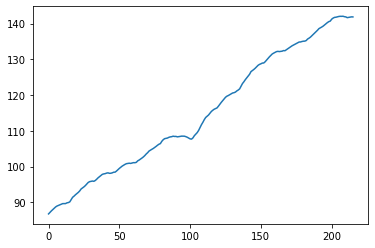

In [43]:
df_p['rmse'].plot()

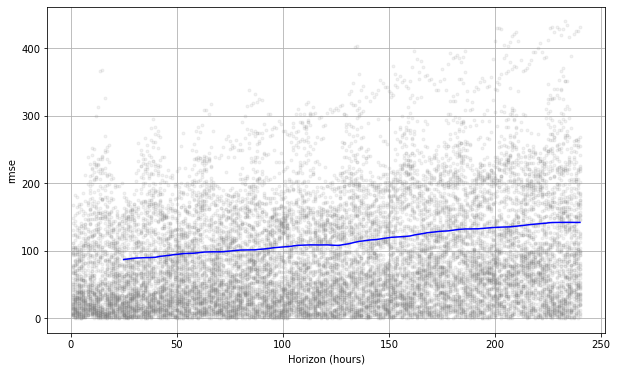

In [45]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv, metric='rmse')

this is the root mean squared error using Prophet. I will now attempt to use XGBoost to have a lower metric and more accurate prediction

## Next Steps:

Add more data: One way to improve your forecast is to increase the amount of data you have available. This can help the model learn more patterns and improve its accuracy.

Add relevant regressors: You can also try adding relevant regressors to your model that capture additional information about the data. For example, if you are forecasting sales data, you could add information about holidays, promotions, or weather.

Adjust hyperparameters: Prophet has several hyperparameters that can be adjusted to optimize the model for your specific dataset. You can experiment with adjusting hyperparameters such as the growth rate, changepoint prior scale, seasonality prior scale, and holidays prior scale.

Adjust seasonality settings: Prophet also allows you to adjust the seasonality settings, such as the number of Fourier terms used to model seasonality. You can experiment with increasing or decreasing the number of Fourier terms to improve the accuracy of your forecast.

Use cross-validation: You can use cross-validation to evaluate the performance of your model on a validation set and adjust hyperparameters or other settings to improve the model's accuracy.

Use ensemble methods: You can also try using ensemble methods to combine multiple forecasts from different models. For example, you could combine the Prophet forecast with a forecast from an ARIMA model or a neural network

### XG BOOST

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
import xgboost as xgb

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

Break up our data into 4 groups for XG Boost, X_train, X_test, Y_train, Y_test

In [67]:
X_train = train[['france', 'italy','belgium','spain','germany']]
Y_train = train['y']

X_test = test[['france', 'italy','belgium','spain','germany']]
Y_test = test['y']

In [68]:
reg.fit(X_train,Y_train,eval_set=[(X_train, Y_train),(X_test,Y_test)],verbose=100)

[0]	validation_0-rmse:335.92838	validation_1-rmse:199.19285
[100]	validation_0-rmse:126.72782	validation_1-rmse:75.59236
[200]	validation_0-rmse:53.91427	validation_1-rmse:39.51082
[300]	validation_0-rmse:32.93161	validation_1-rmse:32.44275
[400]	validation_0-rmse:28.55780	validation_1-rmse:31.96875
[422]	validation_0-rmse:28.24587	validation_1-rmse:31.99450


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Lets see what features are most important

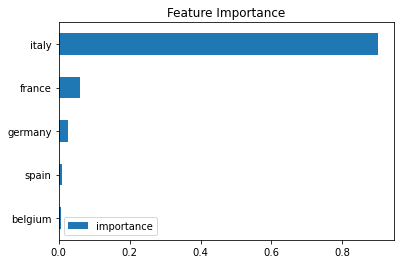

In [59]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [64]:
y_pred = reg.predict(X_test)

In [69]:
rmse = np.sqrt(mean_squared_error(test['y'],y_pred))

NameError: name 'mean_squared_error' is not defined